In [31]:
import pandas as pd
import plotly.express as px

In [23]:
dados = [(2016, 70), (2017, 300), (2018, 550), (2019, 812), (2020, 841), (2021, 824), (2022, 940)]
linha_do_tempo_ong = pd.DataFrame(dados, columns=['Ano', 'Quantidade de alunos'])
linha_do_tempo_ong.head()

,Ano,Quantidade de alunos
0,2016,70
1,2017,300
2,2018,550
3,2019,812
4,2020,841


In [24]:
dados_estimados = pd.read_csv('Base de dados\\populacao_estimativa_2001_2021.csv',sep = ';', encoding='utf-8-sig')
novos_nomes = dados_estimados.iloc[2]
dados_estimados = dados_estimados.rename(columns=novos_nomes)
dados_estimados.columns = [str(col).replace('.0', '') for col in dados_estimados.columns]
dados_estimados['Município'].fillna('', inplace=True)
dados_estimados = dados_estimados[dados_estimados['Município'].str.contains('(SP)')]
dados_estimados.reset_index(drop=True, inplace=True)
dados_estimados['Município'] = dados_estimados['Município'].str.replace('(', '')
dados_estimados['Município'] = dados_estimados['Município'].str.replace(')', '')
dados_estimados['Município'] = dados_estimados['Município'].str.replace('SP', '')
dados_estimados['Município'] = dados_estimados['Município'].str.strip()
dados_estimados= dados_estimados[dados_estimados['Município']=='Embu-Guaçu']
dados_estimados.head()

C:\Users\ferre\AppData\Local\Temp\ipykernel_13044\3845275586.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dados_estimados = dados_estimados[dados_estimados['Município'].str.contains('(SP)')]


,Município,2001,2002,2003,2004,2005,2006,2008,2009,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
168,Embu-Guaçu,59218,61259,63274,67505,69847,72170,61701,62137,63219,63653.0,66273.0,66792.0,67296.0,67788.0,68270.0,68856.0,69385.0,69901.0,70402.0


In [25]:
dados_estimados_ultimos_anos = dados_estimados[dados_estimados.columns[-6:]].T.reset_index()
dados_estimados_ultimos_anos = dados_estimados_ultimos_anos.rename(columns= {'index': 'Ano', 168: 'População do município'})
dados_estimados_ultimos_anos

,Ano,População do município
0,2016,67788.0
1,2017,68270.0
2,2018,68856.0
3,2019,69385.0
4,2020,69901.0
5,2021,70402.0


In [26]:
dados_estimados_ultimos_anos['Ano'] = dados_estimados_ultimos_anos['Ano'].astype('int64')

In [27]:
linha_do_tempo_ong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Ano                   7 non-null      int64
 1   Quantidade de alunos  7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [28]:
dados_estimados_ultimos_anos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ano                     6 non-null      int64  
 1   População do município  6 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 224.0 bytes


In [29]:
df_alunos_populacao = pd.merge(linha_do_tempo_ong, dados_estimados_ultimos_anos, on='Ano', how='left')
df_alunos_populacao

,Ano,Quantidade de alunos,População do município
0,2016,70,67788.0
1,2017,300,68270.0
2,2018,550,68856.0
3,2019,812,69385.0
4,2020,841,69901.0
5,2021,824,70402.0
6,2022,940,NaN


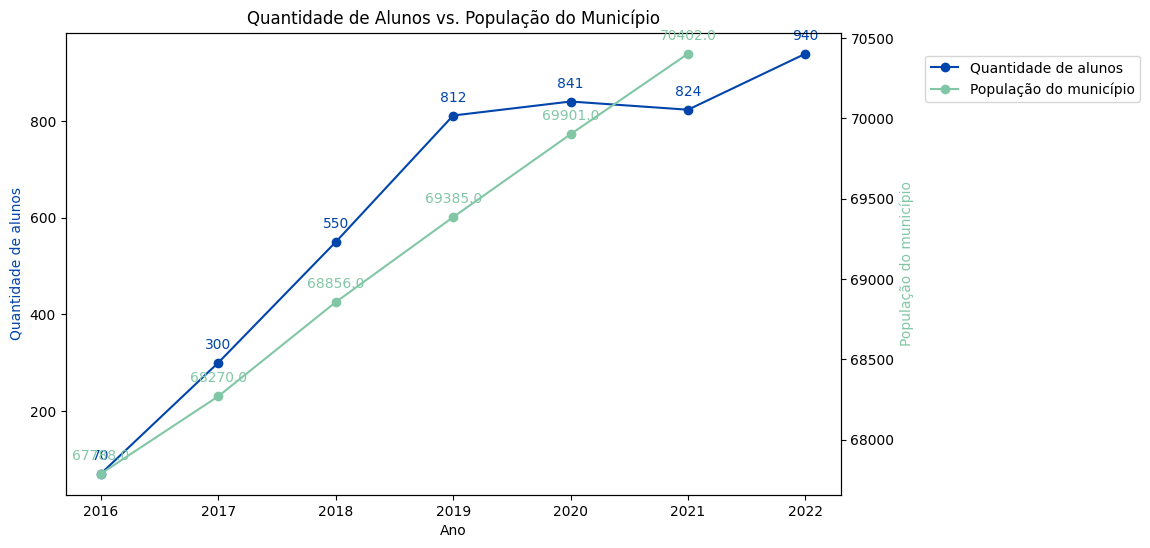

In [53]:
import matplotlib.pyplot as plt

# Criando uma figura e eixos com tamanho personalizado
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotando a primeira série de dados (Quantidade de alunos)
ax1.plot(df_alunos_populacao['Ano'], df_alunos_populacao['Quantidade de alunos'], color='#0145AC', label='Quantidade de alunos', marker='o')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade de alunos', color='#0145AC')

# Adicionando rótulos de dados (annotações) para os pontos específicos
for x, y in zip(df_alunos_populacao['Ano'], df_alunos_populacao['Quantidade de alunos']):
    ax1.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='#0145AC')

# Criando o segundo eixo y (População do município)
ax2 = ax1.twinx()
ax2.plot(df_alunos_populacao['Ano'], df_alunos_populacao['População do município'], color='#82C7A5', label='População do município', marker='o')
ax2.set_ylabel('População do município', color='#82C7A5')

# Adicionando rótulos de dados (annotações) para os pontos específicos
for x, y in zip(df_alunos_populacao['Ano'], df_alunos_populacao['População do município']):
    ax2.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='#82C7A5')

# Adicionando legenda fora do gráfico
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.9))

# Exibindo o gráfico
plt.title('Quantidade de Alunos vs. População do Município')
plt.show()





In [58]:
# FUNÇÃO GRÁFICO EIXO SECUNDÁRIO
# Criando uma figura e eixos com tamanho personalizado
def grafico_eixo_secundario(df, x, y, y2):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotando a primeira série de dados (Quantidade de alunos)
    ax1.plot(df[x], df[y], color='#0145AC', label=y, marker='o')
    ax1.set_xlabel(x)
    ax1.set_ylabel(y, color='#0145AC')

    # Adicionando rótulos de dados (annotações) para os pontos específicos
    for a, b in zip(df[x], df[y]):
        ax1.annotate(f'{b}', (a, b), textcoords="offset points", xytext=(0,10), ha='center', color='#0145AC')

    # Criando o segundo eixo y (População do município)
    ax2 = ax1.twinx()
    ax2.plot(df[x], df[y2], color='#82C7A5', label=y2, marker='o')
    ax2.set_ylabel(y2, color='#82C7A5')

    # Adicionando rótulos de dados (annotações) para os pontos específicos
    for a, b in zip(df[x], df[y2]):
        ax2.annotate(f'{b}', (a, b), textcoords="offset points", xytext=(0,10), ha='center', color='#82C7A5')

    # Adicionando legenda fora do gráfico
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.9))

    # Exibindo o gráfico
    plt.title(f'{y} vs {y2}')
    plt.show()

KeyError: 2022

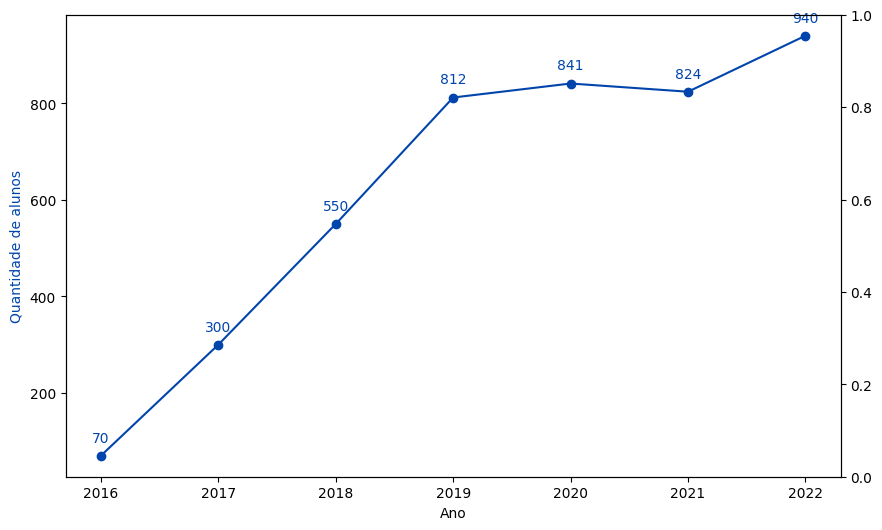

In [56]:
grafico_eixo_secundario(df_alunos_populacao, 'Ano', 'Quantidade de alunos', 'População do município')
plt.show()